In [177]:
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal                    
import matplotlib.patches as patches
import seaborn as sns
import scipy.signal as signal 
from scipy.io import loadmat
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from pathlib import Path

In [193]:
def txt_to_df(file):
    f = open(file)
    lines = f.readlines()[4:]
    att = lines[0].strip('\n').split(', ')
    rows = []
    for row in lines[1:]:
        tmp_row = row.strip('\n').split(', ')
        typed_row = [float(element) for element in tmp_row[:-1]] + [tmp_row[-1]]
        rows.append(typed_row)
    return pd.DataFrame(rows, columns = att)

In [246]:
df2 = txt_to_df('Celine_3_Easy_2.txt')
df1 = txt_to_df('Celine_3_Easy_1.txt')

In [264]:
df1.shape

(9861, 25)

In [290]:
channel = np.array(df1['EXG Channel 3'])[7000:8000]#[-250:-200]
timestamp = np.array(df1['Timestamp'])[7000:8000]#[-250:-200]
#plt.plot(timestamp, channel)

In [291]:
filter_type = 'bandpass'
lowcut = 0.1
highcut = 30
filter_order = 4
fs = 250

In [292]:
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(filter_order, [low, high], btype=filter_type)

In [293]:
filtered_data = signal.filtfilt(b, a, channel, axis=0)
filtered_data

array([  4.13485435,   6.77274025,   8.8373917 ,  10.04226782,
        10.45717121,  10.36447705,  10.07818545,   9.84534435,
         9.80684583,   9.97495263,  10.25262298,  10.50963964,
        10.65657033,  10.66531754,  10.56425838,  10.44113426,
        10.41986141,  10.58638108,  10.92779445,  11.35546144,
        11.77747202,  12.13754899,  12.41360415,  12.6232619 ,
        12.82962905,  13.10297971,  13.46087208,  13.85840886,
        14.23033621,  14.51599958,  14.65007173,  14.57441173,
        14.2820712 ,  13.82723041,  13.27426162,  12.65216739,
        11.96540711,  11.22150389,  10.43136029,   9.61194354,
         8.81937488,   8.16143815,   7.7408721 ,   7.58214415,
         7.62437851,   7.76957208,   7.91925537,   7.99473478,
         7.97735151,   7.93942802,   7.99861733,   8.21910006,
         8.5648672 ,   8.94286045,   9.26433344,   9.46655825,
         9.51795735,   9.42913303,   9.24124013,   8.98637456,
         8.67457612,   8.33048929,   8.01905908,   7.81

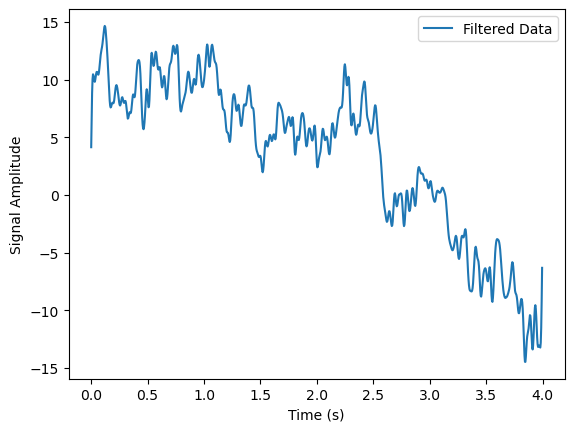

In [294]:
t = np.arange(channel.shape[0]) / fs
plt.figure()
#plt.plot(t, channel_2, label='Raw Data')
plt.plot(t, filtered_data, label='Filtered Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.show()

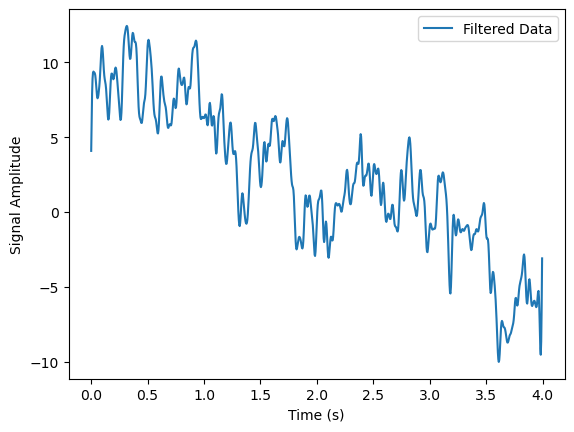

In [300]:
channel = np.array(df2['EXG Channel 3'])[7000:8000]#[-250:-200]
timestamp = np.array(df2['Timestamp'])[7000:8000]#[-250:-200]
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(filter_order, [low, high], btype=filter_type)
filtered_data = signal.filtfilt(b, a, channel, axis=0)
t = np.arange(channel.shape[0]) / fs
plt.figure()
#plt.plot(t, channel_2, label='Raw Data')
plt.plot(t, filtered_data, label='Filtered Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.show()

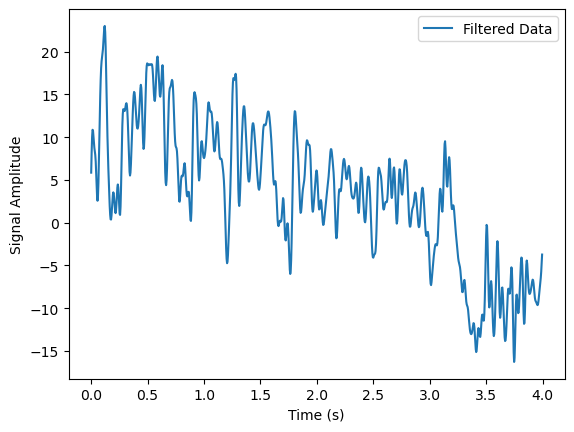

In [283]:
channel = np.array(df2['EXG Channel 1'])[5000:6000]#[-250:-200]
timestamp = np.array(df2['Timestamp'])[5000:6000]#[-250:-200]
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(filter_order, [low, high], btype=filter_type)
filtered_data = signal.filtfilt(b, a, channel, axis=0)
t = np.arange(channel.shape[0]) / fs
plt.figure()
#plt.plot(t, channel_2, label='Raw Data')
plt.plot(t, filtered_data, label='Filtered Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.show()

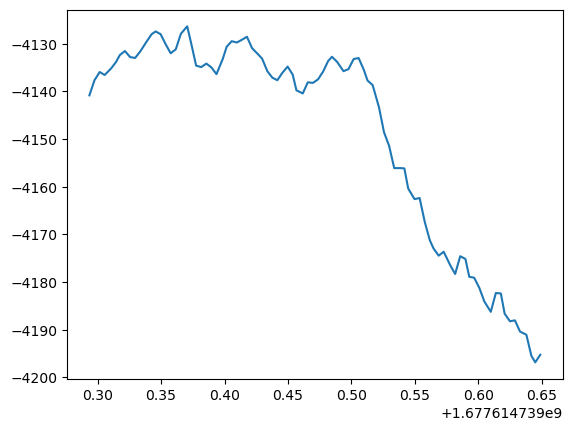

In [238]:
channel_2 = np.array(df['EXG Channel 1'])[10:100]#[-250:-200]
timestamp = np.array(df['Timestamp'])[10:100]#[-250:-200]
plt.plot(timestamp, channel_2)

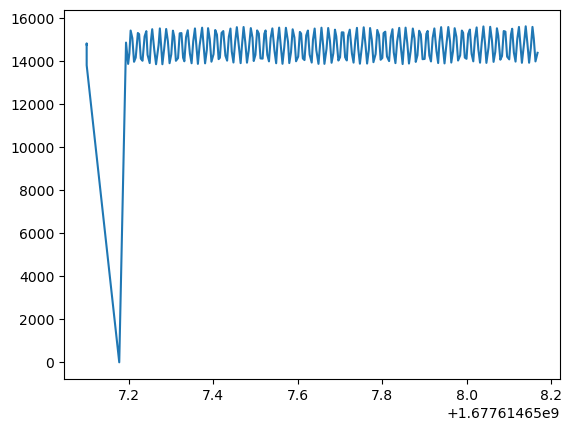

In [68]:
channel_2 = np.array(df['EXG Channel 2'])[:250]#[-250:-200]
timestamp = np.array(df['Timestamp'])#[-250:-200]
plt.plot(timestamp, channel_2)

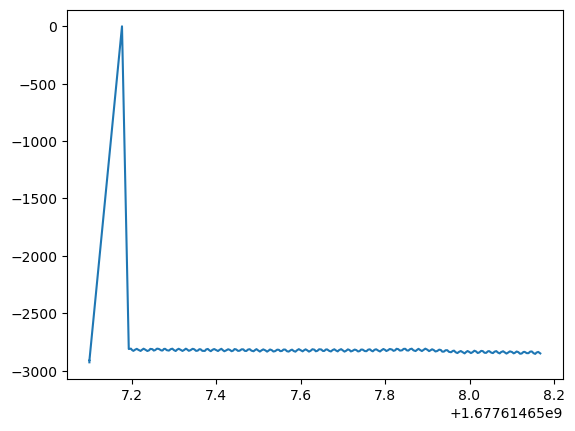

In [70]:
channel_2 = np.array(df['EXG Channel 3'])[:250]#[-250:-200]
timestamp = np.array(df['Timestamp'])#[-250:-200]
plt.plot(timestamp, channel_2)

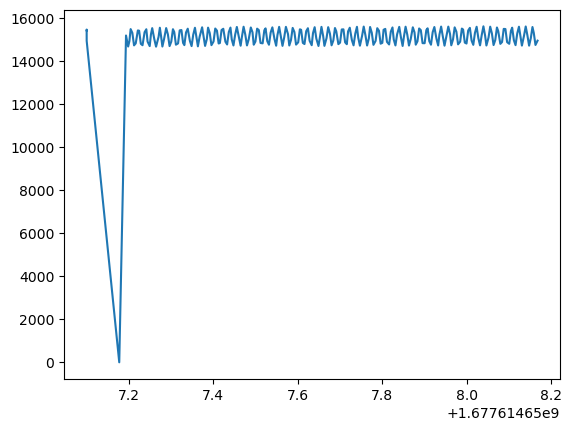

In [69]:
channel_2 = np.array(df['EXG Channel 4'])[:250]#[-250:-200]
timestamp = np.array(df['Timestamp'])#[-250:-200]
plt.plot(timestamp, channel_2)

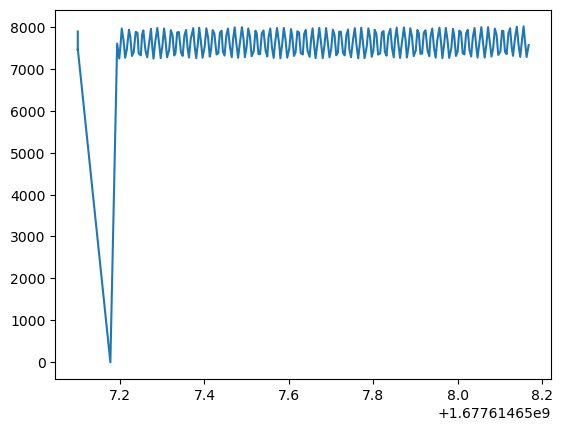

In [71]:
channel_2 = np.array(df['EXG Channel 5'])[:250]#[-250:-200]
timestamp = np.array(df['Timestamp'])#[-250:-200]
plt.plot(timestamp, channel_2)

In [36]:
txt_to_df('Celine_3_Easy_2.txt')

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,Accel Channel 0,...,Other,Other,Other,Other,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other,Timestamp (Formatted)
0,134.0,27874.592289,-4186.392330,15312.151946,-2945.222312,15529.746178,7789.761757,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:05:39.153
1,135.0,27750.428349,-4182.033739,14628.702656,-2934.404067,15179.315529,7453.524465,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:05:39.153
2,136.0,27682.948432,-4182.458422,14091.992568,-2934.918157,14896.990645,7295.564687,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:05:39.153
3,137.0,27795.578873,-4185.252391,14693.433308,-2945.334070,15207.054044,7606.499804,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:05:39.153
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.182,...,232.0,80.0,236.0,16.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:05:39.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10147,159.0,27396.823752,-4054.315872,14658.832807,-2961.092050,15090.579103,7140.935319,-187500.022352,-187500.022352,-0.206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:06:19.788
10148,160.0,27343.313675,-4053.175933,14218.145814,-2961.650844,14855.774028,7039.190178,-187500.022352,-187500.022352,-0.206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:06:19.792
10149,161.0,27489.270567,-4049.465543,14928.975991,-2970.390376,15222.230878,7397.153365,-187500.022352,-187500.022352,-0.206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:06:19.796
10150,162.0,27576.218853,-4041.508322,15473.978576,-2967.350539,15521.923068,7552.654451,-187500.022352,-187500.022352,-0.206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.677615e+09,0.0,2023-02-28 12:06:19.801
